In [41]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo,encoding='latin1')
    return dict

# Open the meta file
meta = unpickle('cifar-10-batches-py/batches.meta')
# Open the data file
d1 = unpickle('cifar-10-batches-py/data_batch_1')
d2 = unpickle('cifar-10-batches-py/data_batch_2')
d3 = unpickle('cifar-10-batches-py/data_batch_3')
d4 = unpickle('cifar-10-batches-py/data_batch_4')
d5 = unpickle('cifar-10-batches-py/data_batch_5')
# Open the test file
test = unpickle('cifar-10-batches-py/test_batch')

In [42]:
# Print the keys of the data
print(type(meta))
print(meta.keys()) 
print("Label Names:", meta['label_names'] )

# Print d1 keys
print(d1.keys()) 
print(d1['labels'][0:10])
print(d1['data'].shape)



<class 'dict'>
dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])
Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
dict_keys(['batch_label', 'labels', 'data', 'filenames'])
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
(10000, 3072)


In [43]:
# Reshape the data to 32x32x3
d1_img = d1['data'].reshape((10000, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")
d2_img = d2['data'].reshape((10000, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")
d3_img = d3['data'].reshape((10000, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")
d4_img = d4['data'].reshape((10000, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")
d5_img = d5['data'].reshape((10000, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")
test_img = test['data'].reshape((10000, 3, 32, 32)).transpose(0,2,3,1).astype("uint8")
# Add labels to the images using meta data
d1_labels = np.array(d1['labels'])
d2_labels = np.array(d2['labels'])
d3_labels = np.array(d3['labels'])
d4_labels = np.array(d4['labels'])
d5_labels = np.array(d5['labels'])
test_labels = np.array(test['labels'])

# Change the labels to meta labels
d1_labels = np.array([meta['label_names'][i] for i in d1_labels])
d2_labels = np.array([meta['label_names'][i] for i in d2_labels])
d3_labels = np.array([meta['label_names'][i] for i in d3_labels])
d4_labels = np.array([meta['label_names'][i] for i in d4_labels])
d5_labels = np.array([meta['label_names'][i] for i in d5_labels])
test_labels = np.array([meta['label_names'][i] for i in test_labels])

In [ ]:
# Concatenate the data
data = np.concatenate((d1_img,d2_img,d3_img,d4_img,d5_img),axis=0)
labels = np.concatenate((d1_labels,d2_labels,d3_labels,d4_labels,d5_labels),axis=0)

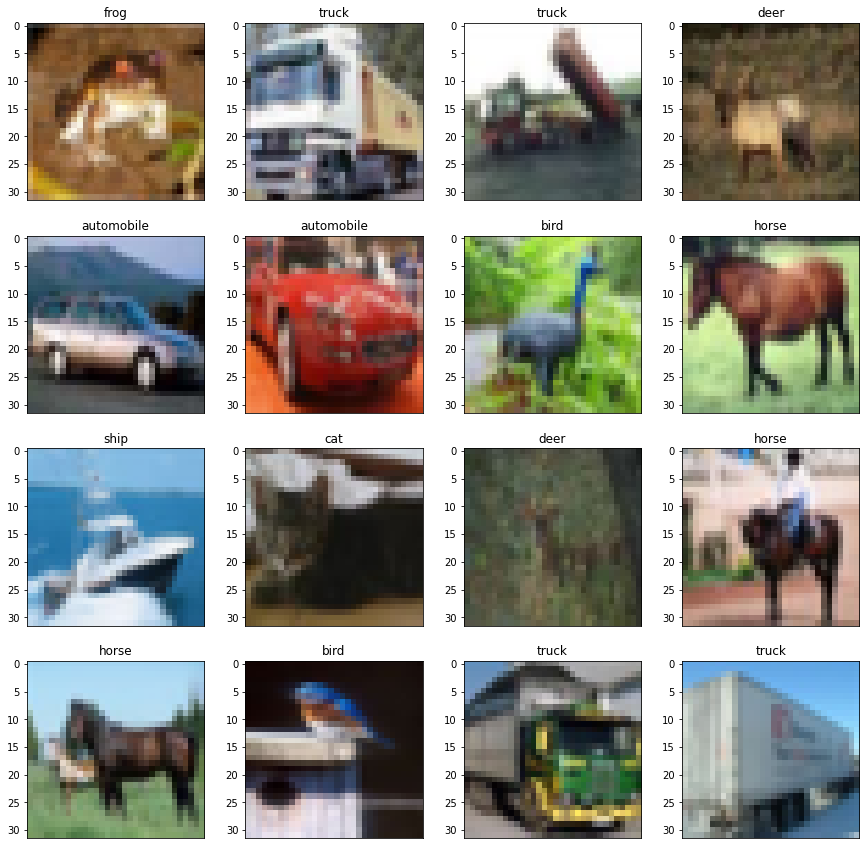

In [45]:
# Preview the images first
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(d1_img[i])
    plt.title(d1_labels[i])
    plt.xticks([])
plt.show()
